#Step-1:Select the number k of the neighbours.
#Step-2:Calculate the Eucledian distance of k number of neighbours.
#Step-3:Take the K nearest neighbors as per the calculated Eucledian distance.
#Step-4:Among these k neighbors,count the number of the data points.
#Step-5:Assign the new data points to that category for which the number of the neighbor is maximum.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data=df.head(20)

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.181410,-0.058186,-0.806660,-0.486759,-0.386041,-0.039599,0.182946,-0.015099
Glucose,0.181410,1.000000,0.219686,0.016168,0.553790,-0.072565,0.209934,0.667874,0.452664
BloodPressure,-0.058186,0.219686,1.000000,0.008259,0.036305,-0.314031,-0.041423,0.308379,0.098262
SkinThickness,-0.806660,0.016168,0.008259,1.000000,0.461601,0.450973,0.103832,0.043219,0.209843
Insulin,-0.486759,0.553790,0.036305,0.461601,1.000000,0.118807,-0.023130,0.491582,0.316934
BMI,-0.386041,-0.072565,-0.314031,0.450973,0.118807,1.000000,0.236690,-0.383225,-0.077424
DiabetesPedigreeFunction,-0.039599,0.209934,-0.041423,0.103832,-0.023130,0.236690,1.000000,0.174482,0.191270
Age,0.182946,0.667874,0.308379,0.043219,0.491582,-0.383225,0.174482,1.000000,0.289022
Outcome,-0.015099,0.452664,0.098262,0.209843,0.316934,-0.077424,0.191270,0.289022,1.000000


<AxesSubplot:>

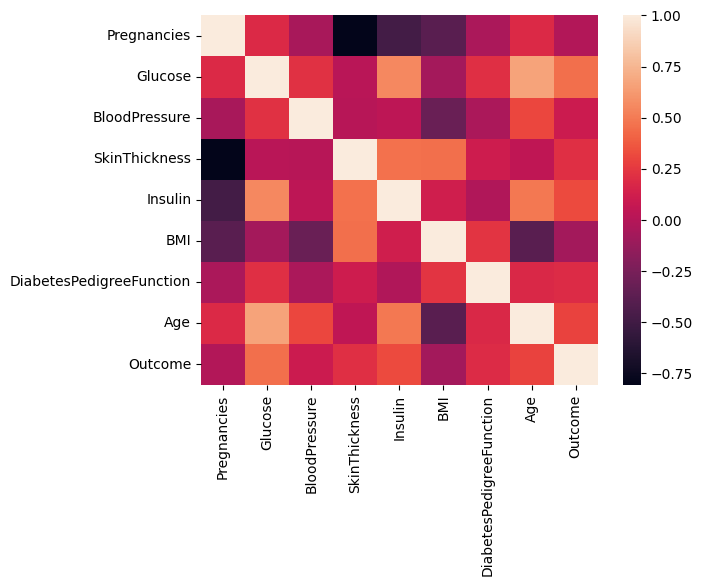

In [7]:
sns.heatmap(data.corr())

In [8]:
new_data=data.drop('Pregnancies',axis=1)
new_data1=data.drop('SkinThickness',axis=1)
new_data2=data.drop('BloodPressure',axis=1)
new_data3=data.drop('BMI',axis=1)
new_data4=data.drop('Age',axis=1)
new_data5=data.drop('DiabetesPedigreeFunction',axis=1)

In [9]:
cols=list(new_data5)
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age',
 'Outcome']

In [10]:
# my_newdata=new_data5.drop('Outcome',axis=1)
my_newdata=new_data5

In [11]:
columns=list(my_newdata)
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age',
 'Outcome']

In [12]:
user_data=[160,35]

In [13]:
# #go through data and find the data
# data_arr=[]
# dist_arr=[]

# for i in range(0,20):
#     for j in cols:
#         print(my_newdata[j][i])
#         elem=my_newdata[j][i]
#         data_arr.append(elem)
#         print(data_arr)
#     dist=((user_data[0]-data_arr[0])**2+(user_data[1]-data_arr[1])**2)**0.5
#     dist_arr.append(dist)
#     dist_arr=[]

In [14]:


data_arr = []
dist_arr = []

for i in range(20):
    data_arr.clear() 
    
    # Iterate through each column in my_newdata
    for j in columns:
        elem = my_newdata[j][i]
        data_arr.append(elem)
    
    # Calculate Euclidean distance between user_data and current row data
    dist = np.sqrt((user_data[0] - data_arr[0])**2 + (user_data[1] - data_arr[1])**2)**0.5
    dist_arr.append(dist)
print(dist_arr)


[13.820653780381464, 12.910318859463397, 14.56540043043163, 12.958380440081173, 13.774875688834706, 13.224542938443902, 12.758607404176978, 13.038404810405298, 15.042999932152657, 13.290844206972421, 13.156460802245409, 14.158811502880496, 13.510244645235918, 14.877925251821658, 14.245818398636503, 12.893206495625128, 13.42561181773407, 13.003639800167623, 13.150308814884514, 13.341348238998245]


In [15]:
dist_arr
result=pd.DataFrame(dist_arr)
result

,0
0,13.820654
1,12.910319
2,14.565400
3,12.958380
4,13.774876
5,13.224543
6,12.758607
7,13.038405
8,15.043000
9,13.290844


In [16]:
result['Glucose']=my_newdata['Glucose']
result['Insulin']=my_newdata['Insulin']
result['Diabetes']=my_newdata['Outcome']
result

,0,Glucose,Insulin,Diabetes
0,13.820654,148,0,1
1,12.910319,85,0,0
2,14.565400,183,0,1
3,12.958380,89,94,0
4,13.774876,137,168,1
5,13.224543,116,0,0
6,12.758607,78,88,1
7,13.038405,115,0,0
8,15.043000,197,543,1
9,13.290844,125,0,1


In [17]:
#for KNN
import math
k=math.sqrt(20) #or k=20**0.5
k

4.47213595499958

In [18]:

k=5
result.nsmallest(5,[0])

,0,Glucose,Insulin,Diabetes
6,12.758607,78,88,1
15,12.893206,100,0,1
1,12.910319,85,0,0
3,12.958380,89,94,0
17,13.003640,107,0,1


In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score
